In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2

episode_reward_2darray.shape: (1000, 5000)


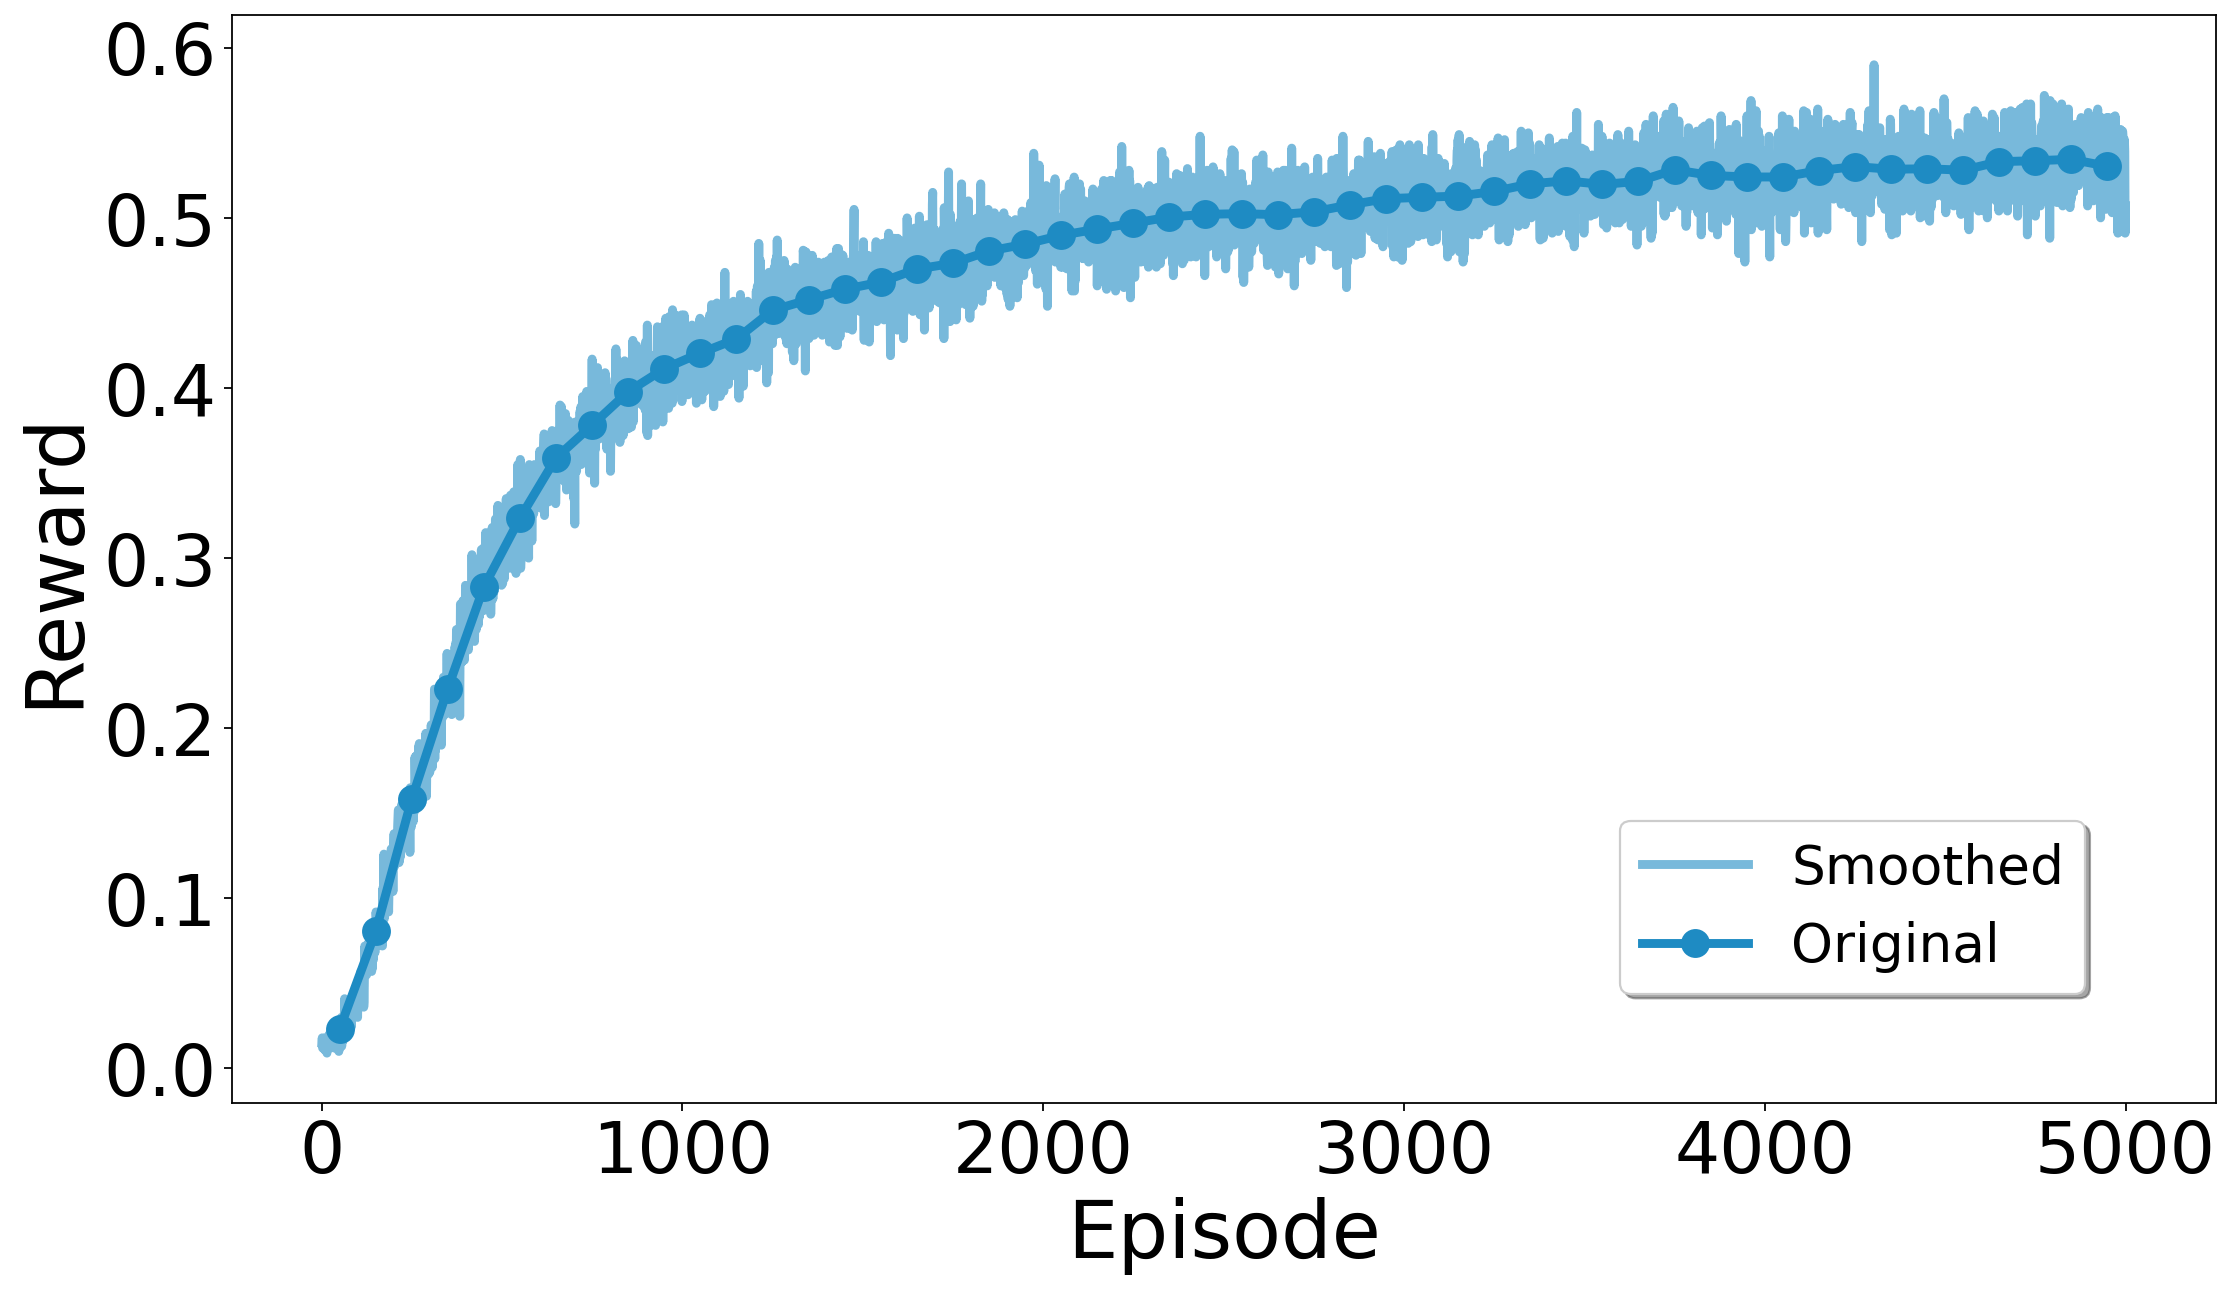

In [2]:
import pickle
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


COLOR = "#1e8bc3"
MARK_EVERY = (0, 1)
MARKER_SIZE = 12.0
LINE_WIDTH = 4.0
FONT_SIZE = 36.0
FONT_SIZE_TICK = 32.0
FIG_SIZE = (16,9)
DPI = 160
GRID = False
FONT_WEIGHT = "normal"
SMOOTH_INTERVAL = 100


# Load the results
results = None
path = "./results/q_learning/results.pkl"
with open(path, "rb") as f:
    results = pickle.load(f)


episode_reward_2darray = results["episode_reward_2darray"]
print("episode_reward_2darray.shape:", episode_reward_2darray.shape)
mean_episode_reward_array = np.mean(episode_reward_2darray, axis=0)
smooth_mean_episode_reward_array = np.mean(mean_episode_reward_array.reshape(-1, SMOOTH_INTERVAL), axis=1)


# Plot the reward list
Path("./results/q_learning/figures").mkdir(parents=True, exist_ok=True)
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
plt.setp(ax.get_xticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
plt.setp(ax.get_yticklabels(), fontsize=FONT_SIZE_TICK, fontweight=FONT_WEIGHT)
ax.yaxis.get_offset_text().set_fontsize(20)
ax.yaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
ax.xaxis.get_offset_text().set_fontsize(20)
ax.xaxis.get_offset_text().set_fontweight(FONT_WEIGHT)
# ax.set_yticks([ -0.2, 0.0, 0.2 ])
# plt.locator_params(axis='x', nbins=3)
ax.plot(range(1, len(mean_episode_reward_array) + 1), mean_episode_reward_array, linestyle='-', color=COLOR, alpha=0.6, label="Smoothed", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
ax.plot([ int((smooth_index + 0.5) * SMOOTH_INTERVAL) for smooth_index in range(len(smooth_mean_episode_reward_array)) ], smooth_mean_episode_reward_array, 'o', markevery=MARK_EVERY, linestyle='-', color=COLOR, label="Original", markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
# ax.legend(shadow=True, loc=(0.35, 0.12), ncol=1, fontsize=24.0)
ax.legend(shadow=True, loc=(0.70, 0.10), fontsize=24.0)
plt.grid(GRID)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.set_xlabel(r'Episode', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
ax.set_ylabel(r'Reward', fontsize=FONT_SIZE, fontweight=FONT_WEIGHT)
# Save the figure
fig.savefig('./results/q_learning/figures/q_learning.pdf', format='pdf', bbox_inches='tight')
fig.savefig('./results/q_learning/figures/q_learning.png', format='png', bbox_inches='tight')
